In [1]:
import os
import numpy as np
import pandas as pd

import argus_shapes

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-05-30 14:39:20,202 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
datafolder = os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape')

In [66]:
X, y = argus_shapes.load_data_raw(datafolder, subject='TB', stim_class=None)

In [67]:
Xy = pd.concat((X, y.drop(columns='electrode')), axis=1)

In [68]:
doubles = Xy.groupby('electrode').filter(lambda x: '_' in x.electrode.values[0])

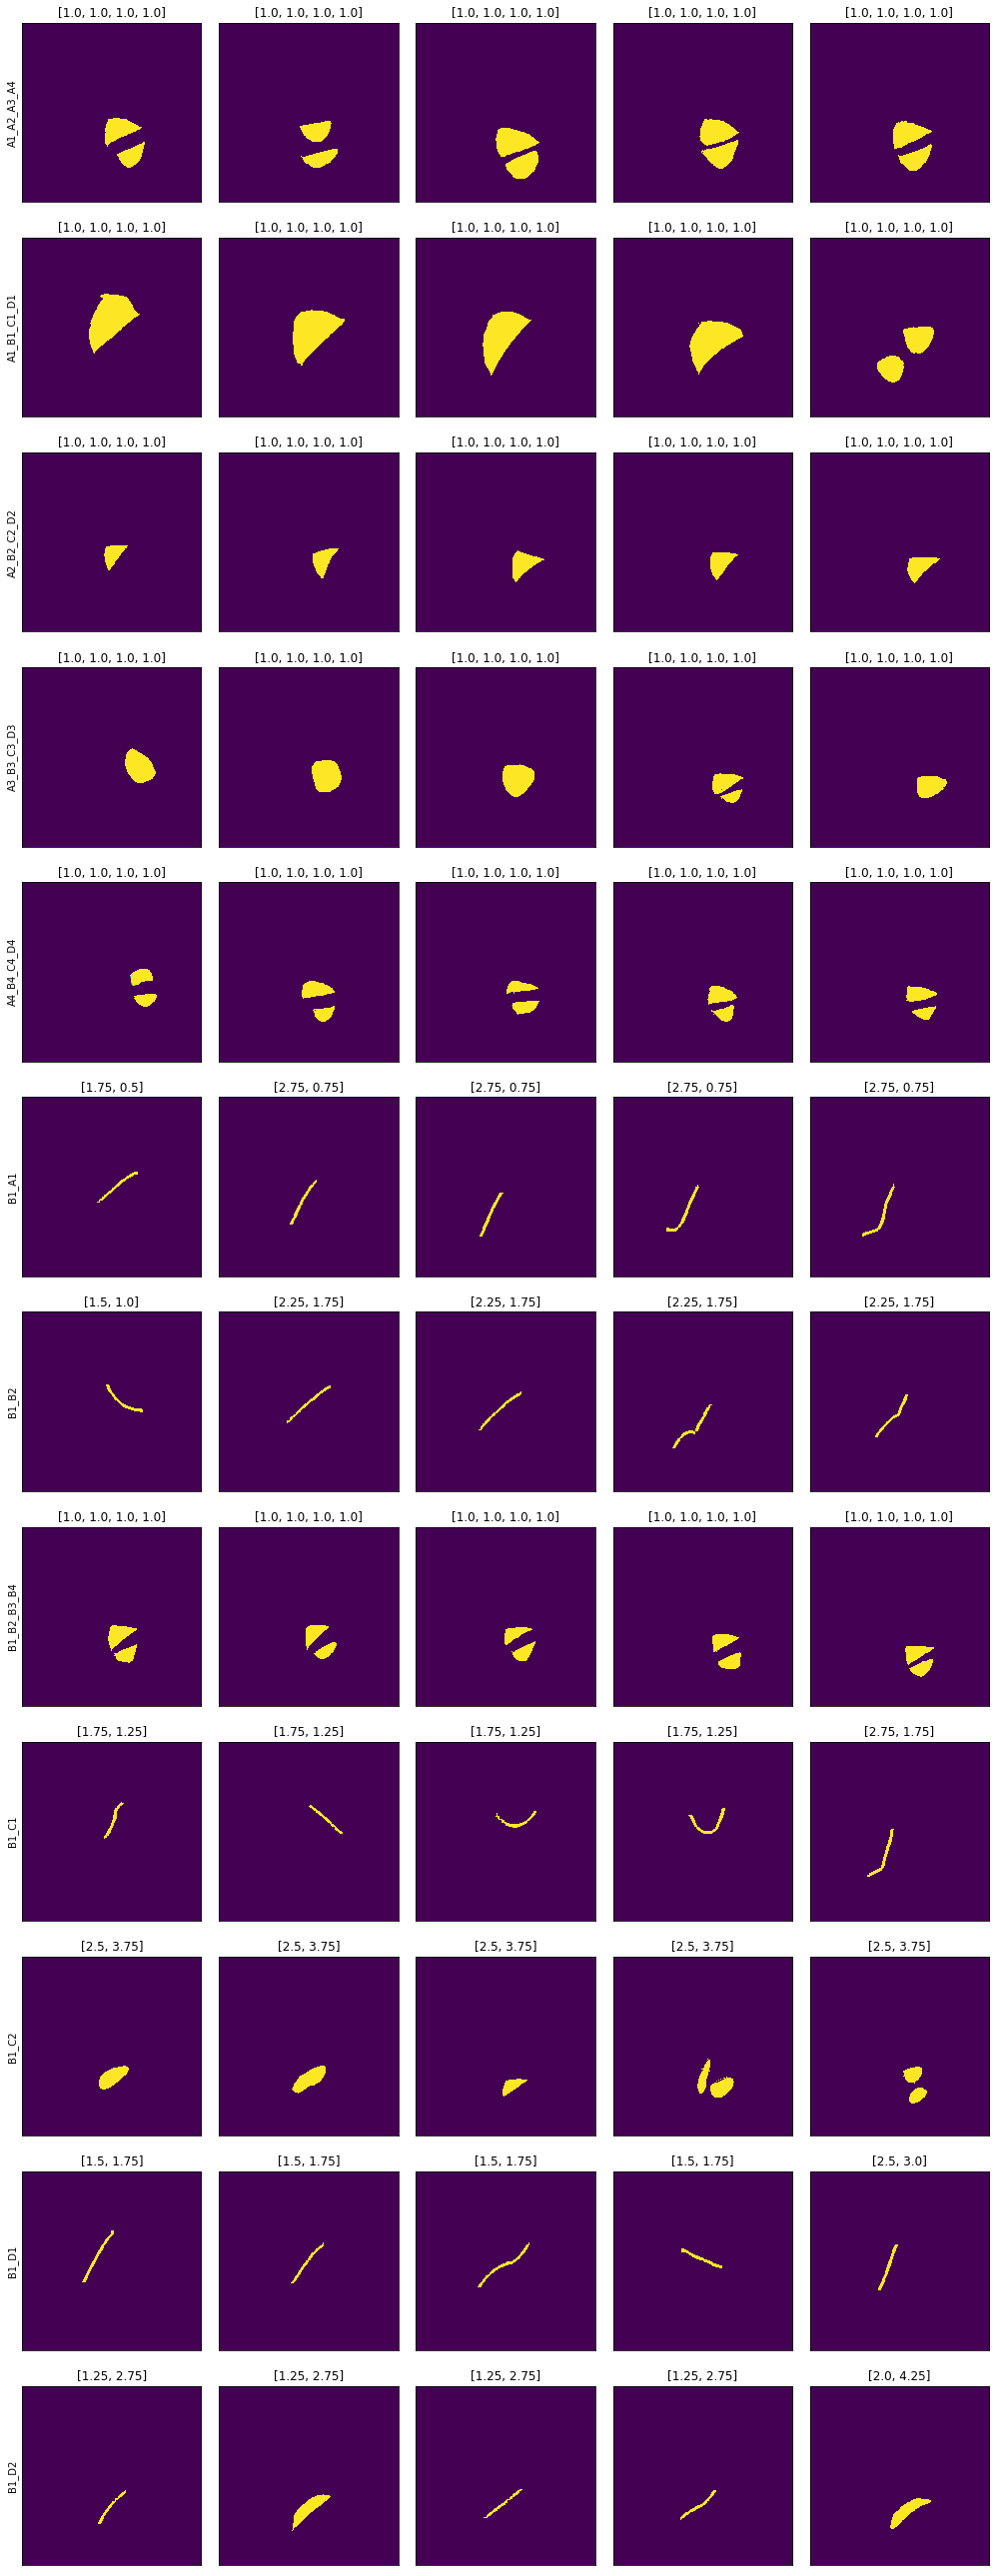

In [69]:
rows = doubles.groupby('electrode')
ncols = 5
nrows = int(np.ceil(len(rows) / ncols))
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 3 * nrows))
for (electrodes, group), axrow in zip(rows, axes):
    for (_, row), ax in zip(group.iterrows(), axrow):
        ax.imshow(row['image'])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(row['amp'])
    axrow[0].set_ylabel(electrodes)
fig.tight_layout()